## A.I. Assignment 4

## Learning Goals

By the end of this lab, you should be able to:
* Get familiar with tensors in pytorch
* Get familiar with the activation functions for ANN 
* Create a simple perceptron model with pytorch



## Common activation functions for ANN:

##### Sigmoid:

The sigmoid function is a popular choice for activation functions in neural networks. It has an $S-shaped$ curve:
$$f(x) = \frac{1}{1+e^{-x}}.$$

It has a number of appealing qualities:

1. *Nonlinearity*: Because the sigmoid function is nonlinear, it enables the neural network to simulate nonlinear interactions between inputs and outputs. A neural network would simply be a linear model without a nonlinear activation function like sigmoid, which would significantly restrict its capacity to describe complex relationships.

1. *Smoothness*: As the sigmoid function is differentiable and smooth, its derivative exist at every point. This is significant because it makes it possible for neural network training techniques based on gradients (such as backpropagation) to perform well.

1. *Boundedness*: The sigmoid function is bounded between 0 and 1, it means  its outputs can be interpreted as probabilities.  It is most useful in applications like binary classification, where the goal is to predict whether an input belongs to one of two classes.

1. *Monotonicity*: The sigmoid function is monotonic, which means that its outputs are always increasing or always decreasing with respect to its inputs. This makes it easy to interpret the effect of changes in input variables on the output of the network.

##### ReLU (Rectified Linear Unit):

The ReLU function is defined as $$f(x) = max(0, x).$$

It is a widely used activation function in deep learning due to its simplicity and effectiveness.

##### Tanh (Hyperbolic Tangent):

The $\tanh$ function is similar to the sigmoid function but produces outputs in the interval $[-1, 1]$:  
$$f(x) = \frac{e^{x}-e^{-x}}{e^{x}+e^{-x}}.$$

##### Softmax:

The softmax function is commonly used in the output layer of a neural network for multi-class classification problems. It normalizes the output into a probability distribution over the classes.

Given a vector $\vec{z}$ of $n$ real numbers, the softmax function calculates a vector $\vec{s}$ of $n$ real numbers with the components:
$$s_j = \frac{e^{z_j}}{\sum_{k=1}^{n} {e^{z_k}}}.$$


##### Leaky ReLU:

The Leaky ReLU is a variation of the ReLU function that introduces a small non-zero gradient for negative inputs. It is defined as 
$$f(x) = max(0.01 \cdot x, x).$$

##### ELU (Exponential Linear Unit):

The ELU function is another variation of the ReLU function that introduces a small negative saturation value for negative inputs. It is defined as 

$$ f(x) = \biggl\{ \begin{matrix} x, & for & x > 0 \\
                      \alpha \cdot (e^{x} - 1), & for & x \leq 0 \end{matrix}$$
where $\alpha$ is a hyperparameter.

##### Swish:

The Swish function is a recent activation function that is a smooth approximation of the ReLU function. It is defined as f(x) = x * sigmoid(x).

In [2]:
import torch
torch.cuda.is_available()

False

create a tensor with requires_grad=True to tell PyTorch to track gradients for this tensor:

In [3]:
x = torch.tensor([2.0], requires_grad=True)
print(x)

tensor([2.], requires_grad=True)


You can perform any operations on this tensor as usual:

In [4]:
y = x ** 2 + 2 * x + 1
print(y)

tensor([9.], grad_fn=<AddBackward0>)


To compute the gradients of y with respect to x, you need to call backward() on y:

In [5]:
y.backward()

In [6]:
x.grad

tensor([6.])

In [8]:
import torch

# Create a tensor with requires_grad=True
x = torch.tensor([1., 2., 3.], requires_grad=True)

# Compute a function of x
y = x.sum()

# Compute gradients of y with respect to x
y.backward()

# Print gradients of x
print(x.grad)


tensor([1., 1., 1.])


Exercise 1.

Compute the gradient for the sigmoid activation function in 2 points using pytorch and check it with the known explicit formula 

In [85]:
import torch

# sigmoid activation function
def sigmoid(x):
    return torch.sigmoid(x)

# explicit gradient for the sigmoid function
# it returns the derivative of the sigmoid function
def sigmoid_gradient_explicit(x):
    return torch.sigmoid(x) * (1 - torch.sigmoid(x)).detach()

# constructing the tensors for 2 points
x1 = torch.tensor([3.0], requires_grad=True)
x2 = torch.tensor([4.0], requires_grad=True)

# computing the gradient for the first point
y1 = sigmoid(x1)
y1.backward()
g1 = x1.grad

# explicit formula for the gradient at the first point
eg1 = sigmoid_gradient_explicit(x1)

# compute the gradient for the second point
y2 = sigmoid(x2)
y2.backward()
g2 = x2.grad

# explicit formula for the gradient at the second point
eg2 = sigmoid_gradient_explicit(x2)

print(g1, g2)
print(eg1.detach(), eg2.detach())


tensor([0.0452]) tensor([0.0177])
tensor([0.0452]) tensor([0.0177])


Exercise 2.

Compute the gradient for the linear activation function in 2 points using pytorch and check it with the known explicit formula

In [68]:
import torch

def linear(x):
    return x

def linear_explicit():
    return torch.tensor([1.])

# constructing the tensors for 2 points
x1 = torch.tensor([1.0], requires_grad=True) #  requires_grad=True flag to compute gradients for x
x2 = torch.tensor([2.0], requires_grad=True) #  requires_grad=True flag to compute gradients for x

# computing the gradient for the first point
y1 = linear(x1)
y1.backward() 
g1 = x1.grad

# explicit formula for the gradient at the first point
eg1 = linear_explicit()

# compute the gradient for the second point
y2 = linear(x2)
y2.backward()
g2 = x2.grad

eg2 = linear_explicit() # second gradient with explicit formula

print(g1, g2)
print(eg1, eg2)

tensor([1.]) tensor([1.])
tensor([1.]) tensor([1.])


Execise 3.

Compute the gradient for the relu activation function in 2 points using pytorch and check it with the known explicit formula.

In [71]:
# your code here
import torch

def relu(x):
    return torch.max(torch.tensor([0.0]), x)

def relu_gradient_explicit(x):
    return torch.tensor([1.0 if x > 0 else 0.0])

# constructing the tensors for 2 points
x1 = torch.tensor([-3.0], requires_grad=True)
x2 = torch.tensor([4.0], requires_grad=True)

# computing the gradient for the first point
y1 = relu(x1)
y1.backward()
g1 = x1.grad

# explicit formula for the gradient at the first point
eg1 = relu_gradient_explicit(x1)

# compute the gradient for the second point
y2 = relu(x2)
y2.backward()
g2 = x2.grad

# Compute the explicit formula for the gradient at x = -2
eg2 = relu_gradient_explicit(x2)

print(g1, g2)
print(eg1, eg2)


tensor([0.]) tensor([1.])
tensor([0.]) tensor([1.])


Exercise 4. 

Write in python a function to plot the sigmoid activation function and its gradient using matplotlib

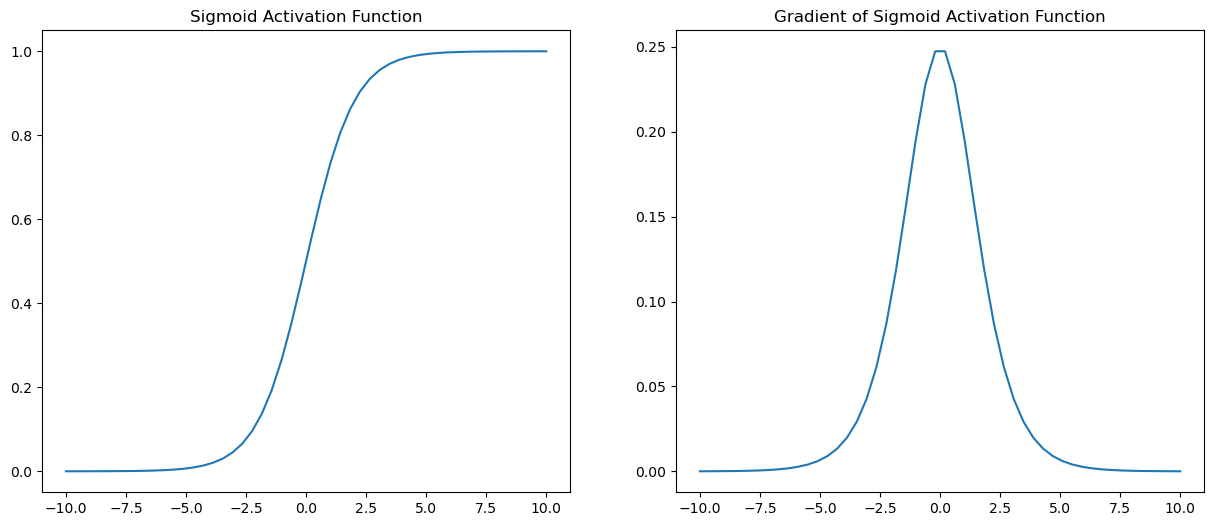

In [1]:
# your code here
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
        return 1 / (1 + np.exp(-x))
    
def sigmoid_grad(x):
    return sigmoid(x) * (1 - sigmoid(x)) # this is the derivative of the sigmoid function

def plot_sigmoid():    
    x = np.linspace(-10, 10) # establishing a range for the plot values

    y = sigmoid(x) # computing the sigmoid function
    dy = sigmoid_grad(x) # computing the gradient

    # making a figure with 2 subplots for the function and corresponding gradient
    fig, ax = plt.subplots(1, 2, figsize=(15, 6))

    # Plot the sigmoid function on the first subplot
    ax[0].plot(x, y)
    ax[0].set_title('Sigmoid Activation Function')

    # Plot the gradient of the sigmoid function on the second subplot
    ax[1].plot(x, dy)
    ax[1].set_title('Gradient of Sigmoid Activation Function')

    plt.show()
    
plot_sigmoid()


Exercise 5. 

Write in python a function to plot the ReLU activation function and its gradient using matplotlib.

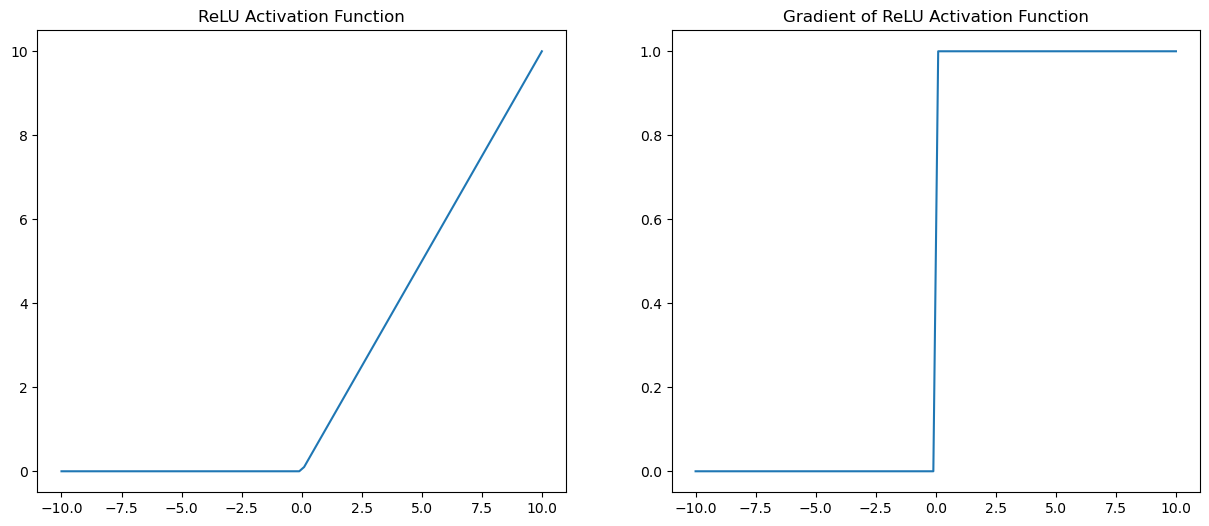

In [102]:
# your code here
import numpy as np
import matplotlib.pyplot as plt

def relu(x):
    return np.maximum(0, x)

def relu_grad(x):
        return np.where(x > 0, 1, 0)
    
def plot_relu():
    x = np.linspace(-10, 10) # establishing a range for the plot values
    
    y = relu(x) # computing the relu function
    dy = relu_grad(x) # computing the gradient

    # making a figure with 2 subplots for the function and corresponding gradient
    fig, ax = plt.subplots(1, 2, figsize=(15, 6))

    ax[0].plot(x, y)
    ax[0].set_title('ReLU Activation Function')

    ax[1].plot(x, dy)
    ax[1].set_title('Gradient of ReLU Activation Function')

    plt.show()

plot_relu()

Exercise 6. 

Write in python a function to plot the tanh activation function and its gradient using matplotlib.

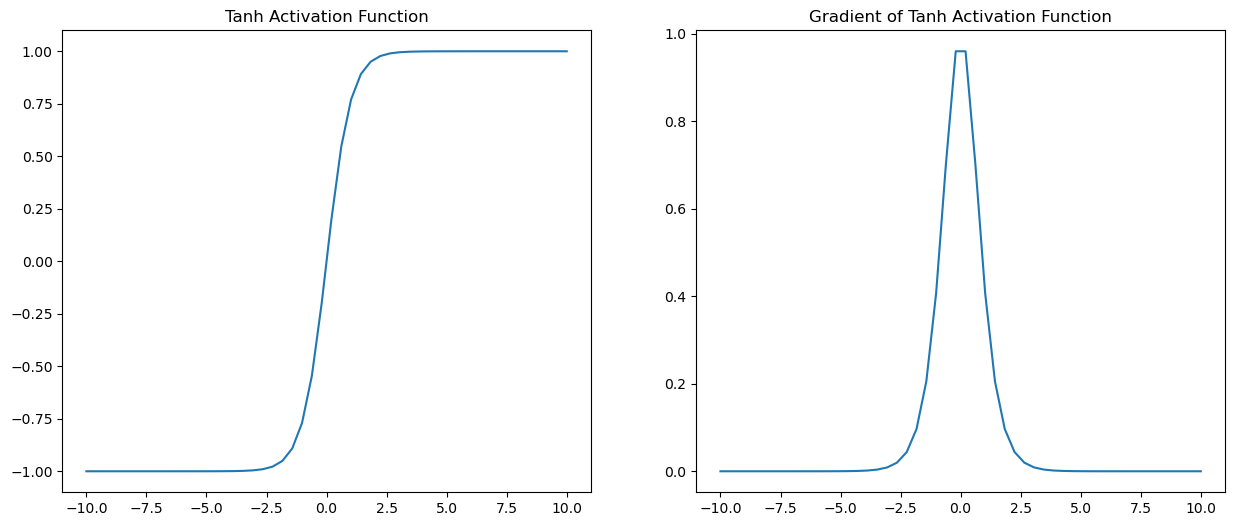

In [103]:
# your code here
import numpy as np
import matplotlib.pyplot as plt

def tanh(x):
        return np.tanh(x)
    
def tanh_grad(x):
        return 1 - np.square(np.tanh(x))

def plot_tanh():    
    x = np.linspace(-10, 10) # establishing a range for the plot values
    
    y = tanh(x) # computing the tanh function
    dy = tanh_grad(x) # computing the gradient for tanh function

    # making a figure with 2 subplots for the function and corresponding gradient
    fig, ax = plt.subplots(1, 2, figsize=(15, 6))

    ax[0].plot(x, y)
    ax[0].set_title('Tanh Activation Function')

    ax[1].plot(x, dy)
    ax[1].set_title('Gradient of Tanh Activation Function')

    plt.show()
    
plot_tanh()

Exercise 7. 

Write in python a function to plot the softmax activation function.

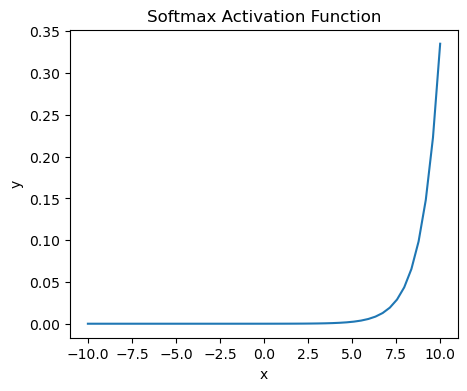

In [4]:
# your code here
import numpy as np
import matplotlib.pyplot as plt

# distribution of probability

def softmax(x):
    """
    computing the exponential of each element of vector x, shifted by the maximum value of x to avoid numerical overflow. 
    then, we subtract the max of x to ensure that the largest value is 1
    """
    e_x = np.exp(x - np.max(x))
    """
    normalizing the exponential values by dividing each element of e_x by the sum of all elements of e_x.
    output : the normalized exponential values
    the returned number is the value of a probability distribution ovet the values
    """
    return e_x / e_x.sum()
    
def plot_softmax():
    # establishing a range for the plot values
    x = np.linspace(-10, 10)

    # the result of softmax function over the range of values
    y = softmax(x)

    # making a figure for the softmax function
    fig, ax = plt.subplots(1, 1, figsize=(5, 4))

    ax.plot(x, y)
    ax.set_title('Softmax Activation Function')
    ax.set_xlabel('x')
    ax.set_ylabel('y')

    plt.show()

plot_softmax()

Exercise 8. 

Write in python a function to plot the leaky ReLU activation function and its gradient using matplotlib.

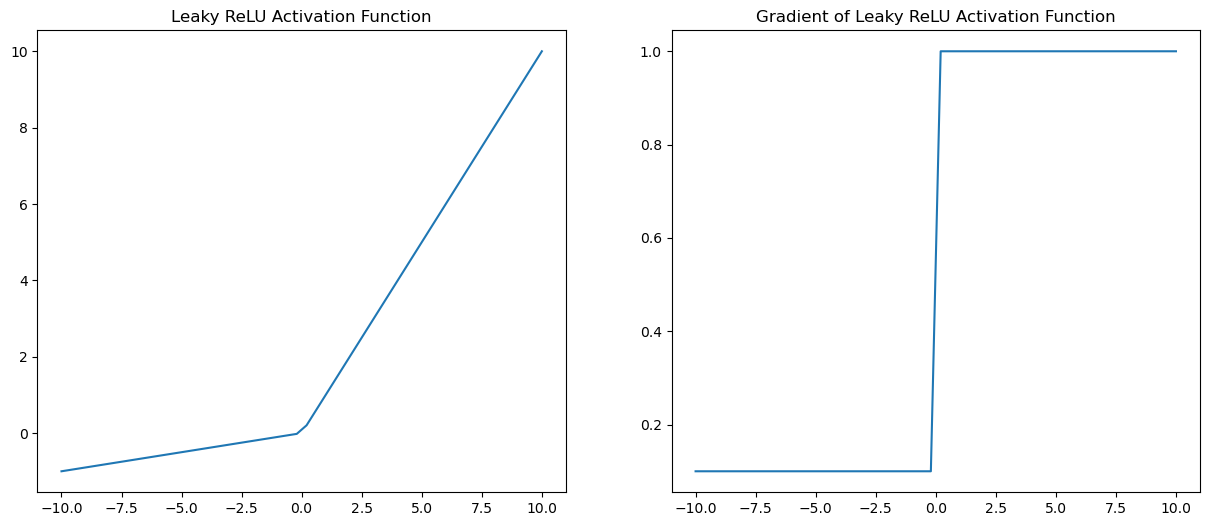

In [5]:
# your code here
import numpy as np
import matplotlib.pyplot as plt

def leaky_relu(x, alpha=0.1):
    return np.maximum(alpha * x, x)

def leaky_relu_grad(x, alpha=0.1):
    grad = np.where(x >= 0, 1, alpha)
    return grad
    
def plot_lrelu():
    x = np.linspace(-10, 10) # establishing a range for the plot values

    y = leaky_relu(x)  # result of leaky relu function
    dy = leaky_relu_grad(x) # gradient of leaky relu function

    # making a figure with 2 subplots for the function and corresponding gradient
    fig, ax = plt.subplots(1, 2, figsize=(15, 6))

    ax[0].plot(x, y)
    ax[0].set_title('Leaky ReLU Activation Function')

    ax[1].plot(x, dy)
    ax[1].set_title('Gradient of Leaky ReLU Activation Function')
    plt.show()

plot_lrelu()

## Perceptron

We define a class called *Perceptron* that inherits from *torch.nn.Module*. 

In the constructor, we define a single fully-connected linear layer with $input_dim$ inputs and $output_dim$ outputs, and a $sigmoid$ activation function. In the forward method, we apply the linear transformation to the input $x$, and then apply the sigmoid activation function to the output.



In [13]:
import torch
import torch.nn as nn

input_size = 2
output_size = 1

class Perceptron(torch.nn.Module):
    def __init__(self, input_dim, output_dim):
        super(Perceptron, self).__init__()
        self.linear = torch.nn.Linear(input_dim, output_dim)
        self.activation = torch.nn.Sigmoid()
        
    def forward(self, x):
        x = self.linear(x)
        x = self.activation(x)
        return x


 We create an instance of this model and use it to make predictions like this:

In [14]:
perceptron = Perceptron(input_size, output_size)
x = torch.tensor([0.5, 0.2])
y = perceptron(x)
print(y)


tensor([0.4131], grad_fn=<SigmoidBackward0>)


In [15]:

# Define the loss function and optimizer
criterion = nn.BCELoss()  # Binary cross-entropy loss
optimizer = torch.optim.SGD(perceptron.parameters(), lr=0.1)  # Stochastic gradient descent optimizer

# Generate some random input data and labels
input_data = torch.randn((10, input_size))
labels = torch.randint(0, 2, (10, output_size)).float()

# Train the model
num_epochs = 1000
for epoch in range(num_epochs):
    # Forward pass
    outputs = perceptron(input_data)
    loss = criterion(outputs, labels)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print the loss every 100 epochs
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [100/1000], Loss: 0.2833
Epoch [200/1000], Loss: 0.2504
Epoch [300/1000], Loss: 0.2363
Epoch [400/1000], Loss: 0.2277
Epoch [500/1000], Loss: 0.2217
Epoch [600/1000], Loss: 0.2171
Epoch [700/1000], Loss: 0.2134
Epoch [800/1000], Loss: 0.2103
Epoch [900/1000], Loss: 0.2077
Epoch [1000/1000], Loss: 0.2054


Exercise 9: 

Implement a binary classification model using the Perceptron class in PyTorch for the logic OR. 

Your task is to create a Perceptron instance and train it using a proper  dataset and the binary cross-entropy loss with stochastic gradient descent optimizer. 

Here are the steps you can follow:

Define a Perceptron class that inherits from torch.nn.Module and implements a binary classification model.

Define a binary cross-entropy loss function using the torch.nn.BCEWithLogitsLoss module.

Define a stochastic gradient descent optimizer using the torch.optim.SGD module.

Train the Perceptron model on the training set using the binary cross-entropy loss and stochastic gradient descent optimizer.

Evaluate the trained model compute the accuracy.


In [20]:
import torch
import torch.nn as nn
import torch.optim as optim

# the training data for OR ( OR possible vslues of (x,y) and OR(x,y) )
train_data = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32)
train_labels = torch.tensor([[0], [1], [1], [1]], dtype=torch.float32)

class Perceptron(nn.Module):
    def __init__(self):
        super(Perceptron, self).__init__()
        self.linear = nn.Linear(2, 1)    # 2 is the input size, 1 is the output size

    def forward(self, x):
        x = self.linear(x)
        return x

criterion = nn.BCEWithLogitsLoss() #binary cross-entropy loss function

# using the stochastic gradient descent optimizer on the perceptron
optimizer = optim.SGD(perceptron.parameters(), lr=0.1) # learning rate is set to 0,1

# Train the Perceptron model 
num_epochs = 1000
for epoch in range(num_epochs):
    # Forward pass
    outputs = perceptron(train_data)
    loss = criterion(outputs, train_labels)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print the loss every 100 epochs
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# evaluate the trained model and compute the accuracy
with torch.no_grad(): #  temporarily sets all of the requires_grad flags to false (backward is not used) ; used for inference
    outputs = perceptron(train_data) # creating an instance
    predicted = (outputs > 0.5).float()  # taking the values bigger than 0.5
    accuracy = (predicted == train_labels).float().mean()
    print('Accuracy: {:.2f}%'.format(accuracy * 100)) # accuracy with 2 points after the dot


Epoch [100/1000], Loss: 0.0801
Epoch [200/1000], Loss: 0.0742
Epoch [300/1000], Loss: 0.0691
Epoch [400/1000], Loss: 0.0646
Epoch [500/1000], Loss: 0.0607
Epoch [600/1000], Loss: 0.0571
Epoch [700/1000], Loss: 0.0540
Epoch [800/1000], Loss: 0.0512
Epoch [900/1000], Loss: 0.0486
Epoch [1000/1000], Loss: 0.0463
Accuracy: 100.00%
